In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [6]:

# Base O3 data
data_primary = {
    "x": [
        "2019-04-03T18:31:01.203Z", "2019-04-13T01:55:34.182Z", "2019-04-23T10:35:19.504Z",
        "2019-05-05T15:10:46.749Z", "2019-05-11T15:44:56.550Z", "2019-05-21T03:02:37.423Z",
        "2019-05-25T13:51:13.370Z", "2019-07-06T03:00:46.823Z", "2019-07-06T22:26:49.308Z",
        "2019-07-27T16:36:44.554Z", "2019-08-05T10:26:24.212Z", "2019-08-11T03:27:44.698Z",
        "2019-08-12T08:54:42.359Z", "2019-08-27T22:56:49.437Z", "2019-08-28T06:34:13.724Z",
        "2019-09-02T09:40:08.280Z", "2019-09-05T09:12:34.822Z", "2019-09-27T16:53:16.324Z",
        "2019-12-13T07:40:00.160Z", "2019-12-13T16:05:09.723Z", "2019-12-19T21:19:07.025Z",
        "2019-12-22T09:26:37.068Z", "2020-01-10T07:24:34.813Z", "2020-01-24T13:07:15.191Z",
        "2020-02-16T02:02:52.554Z"
    ],
    "y": [
        -1.30, -1.03, -1.02, -1.64, -1.08, -2.20, -1.11, -1.06, -2.48, -1.22, -1.10, -2.02,
        -1.65, -1.16, -4.23, -1.02, -1.05, -1.54, -1.45, -1.17, -1.69, -1.58, -1.18, -1.23, -1.07
    ],
}

# Category 2
data_secondary = {
    "x": [
        "2019-05-03T00:26:40.307Z", "2019-05-31T02:41:02.931Z", "2019-12-08T15:05:57.679Z",
        "2019-12-12T05:37:56.434Z", "2020-01-02T12:15:42.682Z", "2020-01-04T20:06:59.401Z",
        "2020-01-14T05:02:47.055Z", "2020-01-29T06:55:16.395Z"
    ],
    "y": [
        -1.71, -5.79, -1.85, -1.08, -3.18, -1.17, -6.70, -1.55
    ],
}


# Highlighted data
highlighted_data = {
    "x": [
        "2019-08-28T06:34:13.724Z",  # -4.23
        "2019-07-06T22:26:49.308Z",  # -2.48
        "2019-05-21T03:02:37.423Z"   # -2.20
    ],
    "y": [-4.23, -2.48, -2.2],
}

# Metric-to-FAR mapping
metric_to_far = {
    # -0.3899999999999997: "1/day",
    -0.91: "1/week",
    -1.3899999999999997: "1/month",
    -2.4299999999999997: "1/year",
    -3.69: "1/10 years",
    -5.13: "1/100 years"
}

In [7]:
# Generate FAR labels for y-axis
metric_levels = sorted(metric_to_far.keys())
far_labels = [metric_to_far[m] for m in metric_levels]

# Convert x data to datetime objects
x_primary = [datetime.datetime.fromisoformat(ts.replace("Z", "")) for ts in data_primary["x"]]
x_secondary = [datetime.datetime.fromisoformat(ts.replace("Z", "")) for ts in data_secondary["x"]]
x_highlighted = [datetime.datetime.fromisoformat(ts.replace("Z", "")) for ts in highlighted_data["x"]]

# Extract y values
y_primary = data_primary["y"]
y_secondary = data_secondary["y"]
y_highlighted = highlighted_data["y"]

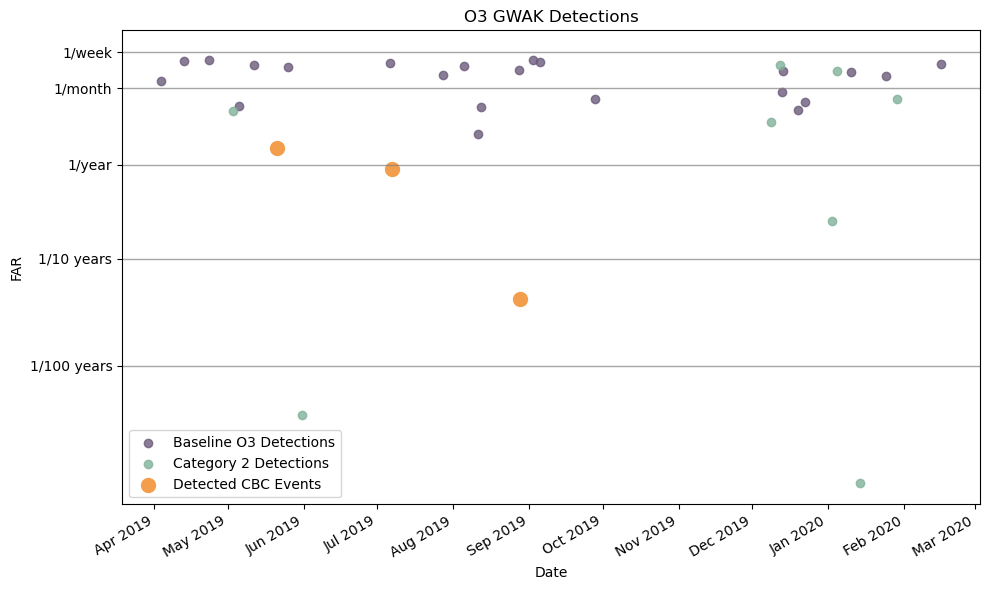

In [8]:
# Define colors
colors = {
    "primary": "#6c5b7b",  # Slate Blue
    "secondary": "#81b29a",  # Amber
    "highlighted": "#f29e4c"  # Carmine Red
}

# Plot
plt.figure(figsize=(10, 6))

# Horizontal lines
for level in metric_levels:
    plt.axhline(level, color="gray", linewidth=1, alpha=0.7)

# Primary data
plt.scatter(x_primary, y_primary, color=colors["primary"], label="Baseline O3 Detections", alpha=0.8)

# Secondary data
plt.scatter(x_secondary, y_secondary, color=colors["secondary"], label="Category 2 Detections", alpha=0.8)

# Highlighted data
plt.scatter(x_highlighted, y_highlighted, color=colors["highlighted"], label="Detected CBC Events", alpha=1.0, s=100)

# Set y-axis to logarithmic scale
# plt.yscale("log")
# plt.gca().invert_yaxis()  # FAR decreases downward
plt.yticks(metric_levels, far_labels)  # Map y-axis ticks to FAR labels

# Set x-axis format for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("FAR")
plt.title("O3 GWAK Detections")

# Show legend
plt.legend()

# Display plot
plt.tight_layout()
# plt.show()

plt.savefig('plots/event_display.png')